<a href="https://colab.research.google.com/github/Chubbychie/5th-NOWPAP-Training-Course-on-Remote-Sensing-Data-Analysis/blob/main/NOWPAP_RST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

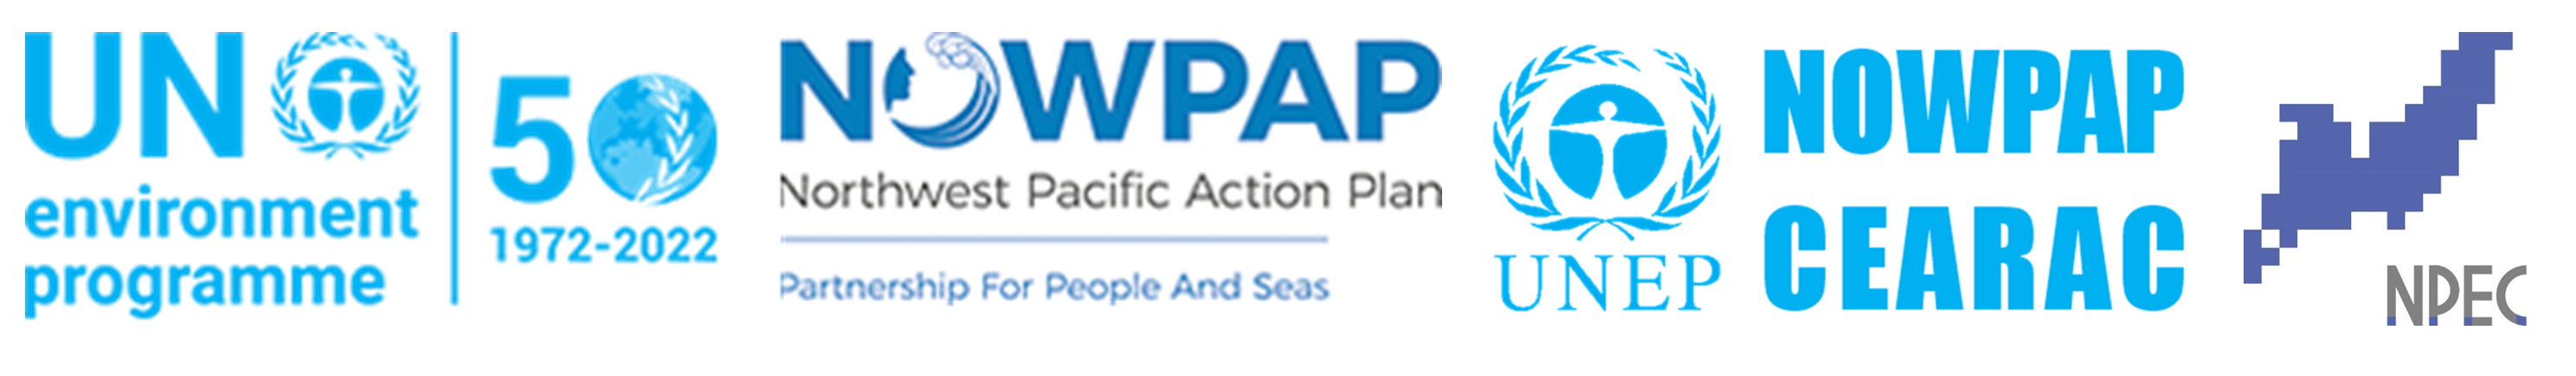

Genki Terauchi, Eligio Maure and
Robel A. Milashu

Please contact terauchi@npec.or.jp for inquiries.

***
**Note 1**: Execute each cell through the <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button from the top left MENU (or keyboard shortcut `Shift` + `Enter`).<br>
***

### Download sample data and NPEC (prepared utilities to process and analyze images) from github

In [ ]:
# only for google colab
!git clone https://github.com/npec/sutilsx.git
!git clone https://github.com/npec/data.git
!pip install h5netcdf==1.3.0
!pip install netCDF4==1.6.5

Cloning into 'sutilsx'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 7 (delta 1), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 3.41 MiB | 12.39 MiB/s, done.
Resolving deltas: 100% (1/1), done.
Cloning into 'data'...
remote: Enumerating objects: 75, done.
remote: Total 75 (delta 0), reused 0 (delta 0), pack-reused 75 (from 2)
Receiving objects: 100% (75/75), 137.13 MiB | 14.24 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Updating files: 100% (65/65), done.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.3 MB/s eta 0:00:00
  Attempting uninstall: h5netcdf
    Found existing installation: h5netcdf 1.5.0
    Uninstalling h5netcdf-1.5.0:
      Successfully uninstalled h5netcdf-1.5.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 58.0 MB/s eta 0:00:00


# Data Download

## A. Library import

Start by importing require modules for data analysis   
If a module throws a `ModuleNotFoundError` install packages on first code of this page  


In [ ]:
# System
import os # Import basic library for your operation system
import sys # Import basic library
from pathlib import Path # Import library to handle path
import warnings #Import library to control warning messages
warnings.filterwarnings('ignore') #Import library to control warning messages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

ValueError: mount failed

In [ ]:
sys.path.append(str(Path('.').absolute().parent)) #Get current path location
import sutilsx as util #Import NPEC prepared utilities to process and analyze images

## B. Define download parameters

| [Subarea acronym](https://ocean.nowpap3.go.jp/?page_id=2297#211_Naming_Convection) | Subarea name |  
|:-- |:-------------|
| NW | NOWPAP Sea Area |  
| AS | Ariake Sea |  
| JB | Jinhae Bay |
| KS | North Kyushu Sea Area-Genkai Sea |  
| PB | Peter the Great Bay |  
| SP | Northern Shandong Peninsula |  
| SS | Southern Korean Peninsula |  
| TB | Toyama Bay |  
| YR | Yangtze River Estuary |  

In [ ]:
# =================================================================
SBA = 'TB'     # Other subareas (TB-Toyama Bay, AS-Ariake Sea, etc.)
VAR = 'CHL'    # variable name ('CHL', 'SST', 'CDOM', 'TSM')
COMP = 'month'   # composite period ('day', 'month', 'year')

SY = 2020      # start year
SM = 1         # start month
SD = 1        # start day of month (only needed if `comp` == 'day')

EY = 2020      # end year
EM = 12        # end month
ED = 31        # end day (only needed if `comp` == 'day')

EXT = ('nc',)  # file extension to download, ('nc',), ('png',) or ('nc','png')

# Sensor(s) to download, sens = ('SeaWiFS', 'MODIS-Aqua', 'MERIS', 'VIIRS-SNPP', 'SGLI', 'YOC') or sens = ('SeaWiFS',)
SEN = ('SGLI',)
# sens = 'SeaWiFS', 'MODIS-Aqua', 'MERIS', 'VIIRS-SNPP', 'YOC'
OUTPUT_DIR = f'data/{{sen}}/{COMP}' #"sen" is sensor name and "COMP" is composite period

## C. Retrieve data
- retrieving data from NMEW

In [ ]:
for sen in SEN: # This section will be repeated if you specify multiple sensors
    print(f'\n{sen}')

    opath = Path(OUTPUT_DIR.format(sen=sen)).absolute()
    if opath.is_dir() is False:
        opath.mkdir(parents=True)
        print(opath)
    util.download(variable=VAR, subarea=SBA, sensor=sen
                  , start_year=SY, end_year=EY
                  , composite_period=COMP, file_type=EXT
                  , start_month=SM, end_month=EM
                  , start_day=SD, end_day=ED, output_dir=opath)

print(f'\ndone!\nOutputDir: {str(opath)}')

## D. Resources
1. https://ocean.nowpap3.go.jp/
2. https://github.com/npec/NMEW.demos/blob/master/NMEW_bulk_download_demo.ipynb
3. https://github.com/npec/NOWPAP_RST/

# Monthly Composites from Daily Data


## A. Purpose

The objective of this exercise is to create composite images from a series of other satellite images obtained in the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

You will learn how to read, composite and display the result of your composite image.
***

## B. Library import


In [ ]:
# Data manipulation
import numpy as np #import numpy as name "np"
from netCDF4 import Dataset #Import Dataset library in netCDF4 module

# System
import sys #Import basic..
from pathlib import Path #Import Path library in pathlib module

# Visualization
import matplotlib.pyplot as plt #Import pyplot library in matplotlib
from matplotlib import colors, ticker # Import colors and tickers in matplotlib

import warnings #Import library to control warning messages
warnings.filterwarnings('ignore') #Import library to control warning messages

%matplotlib inline


In [ ]:
sys.path.append(str(Path('.').absolute().parent)) ##Get current path location
import sutilsx as util #Import NPEC prepared utilities to process and analyze images

## C. Define parameters


In [ ]:
VAR = 'chlor_a'    # variable name
COMP = 'month'   # composite period ('day', 'month', 'year')

INTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/day')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')
if not OUTPUT_DIR.is_dir():
    OUTPUT_DIR.mkdir(parents=True)

INPUT_FILES = list(INTPUT_DIR.glob('GS*.nc')) #Specifing files for composite
#INPUT_FILES

## D. Data preallocation
- Define a function to preallocate memory for the composite

In [ ]:
def preallocate(file: Path, varname: str, t: int):   #Defining function to prepare empty data allay
    with Dataset(file, 'r') as nc:
        shape = np.ma.squeeze(nc[varname][:]).shape
    shape = (t,) + shape
    return np.ma.empty(shape=shape, dtype=np.float32)

## E. Create the composite


In [ ]:
nc = Dataset(INPUT_FILES[0], 'r') #Chekcing variable keynames in netCDF file
nc.variables.keys()

In [ ]:
%%time

# preallocate
file = INPUT_FILES[0] # We need a file to get the shape of data
t = len(INPUT_FILES) # we need to count the number of files to composite
data = preallocate(file=file, t=t, varname=VAR) #data here is an emtpy data ally predifined by preallocate for monthly composite

for i, f in enumerate(INPUT_FILES): #For displaying progress bar
    block = int(50 * (i + 1) // t)
    bar = '█' * block + '-' * (50 - block)
    print(f'\rDay {i + 1:2} {(100 * (i + 1) / t):.1f}% |{bar}| {i+1}/{t}', end='')

    with Dataset(f, 'r') as nc: #For aggregating variable values defined by VAR, in this case chlor_a
        sds = nc[VAR][:]
        data[i, :, :] = np.ma.log10(sds)

count = data.count(axis=0) #For counting number of valid pixels
count = np.ma.masked_where(count == 0, count)
np.ma.set_fill_value(count, fill_value=sds.fill_value)

mean = data.mean(axis=0).astype(np.float32) #For making monthly mean data
mean = np.ma.power(10, mean)
np.ma.set_fill_value(mean, fill_value=sds.fill_value)

print(f'\nComposite done!')

## F. Display the result
- Use matplotlib to display the composite image (we display both composite and count)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True) #Creating a figure with two subplots uisng plt.sublopts() function.

with Dataset(file, 'r') as nc: #Reading lattitude and longitute from netCDF files.
    lat = nc['lat'][:]
    lon = nc['lon'][:]

# LogNorm for chlorophyll data
norm = colors.LogNorm(vmin=0.1, vmax=10)
m1 = ax[0].pcolormesh(lon, lat, mean, cmap='jet', norm=norm)

# Linear scale for count data
nbins = count.max() - count.min()
levels = ticker.MaxNLocator(nbins=nbins).tick_values(count.min(), count.max())
norm = colors.BoundaryNorm(levels, ncolors=256, clip=True)
m2 = ax[1].pcolormesh(lon, lat, count, cmap='jet', norm=norm)

ax[0].set_title('Chlorophyll-a concentration')
plt.colorbar(m1, ax=ax[0], orientation='vertical')
ax[1].set_title('number of valid data')
plt.colorbar(m2, ax=ax[1], orientation='vertical')


## G. Display the result
- Use matplotlib to display the composite image (we display both composite and count)

## H. Save the result

In [ ]:
%%time
# Create a filename to save the data
save = OUTPUT_DIR.joinpath('CREATE-GS202004_CHL_TB_month.nc')

util.nc_write(
    file=save
    , data=mean
    , varname=VAR
    , lon=lon
    , lat=lat
    , count=count)

## I. Save the result


In [ ]:
%%time
# Create a filename to save the data
save = OUTPUT_DIR.joinpath('CREATE-GS202004_CHL_TB_month.nc')

util.nc_write(
    file=save
    , data=mean
    , varname=VAR
    , lon=lon
    , lat=lat
    , count=count)

## J. Resources
1. https://unidata.github.io/netcdf4-python/
2. https://matplotlib.org/
3. https://ocean.nowpap3.go.jp/?page_id=2345
4. https://github.com/npec/NOWPAP_RST/

# Animations from Monthly Images

## A. Purpose

The objective of this exercise is to create animations from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

You will learn how to use [matplotlib](https://matplotlib.org/) to create animations.
***

## B. Library import


In [ ]:
# Data manipulation
import numpy as np

# Library import
from netCDF4 import Dataset, num2date

# System
import sys
from pathlib import Path
import natsort #Importing library for file name sorting

# Visualization to handle animation
import matplotlib.pyplot as plt  #Import pyplot library in matplotlib
import matplotlib.animation as animation #Import animation fucntion of matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import colors
from PIL import Image #To read PNG images #Enabling Image fucction in PIL

import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline
%matplotlib notebook

In [ ]:
sys.path.append(str(Path('.').absolute().parent)) #importing local libraries
import sutilsx as util
# util.mpl_custom(mpl=plt)

## C. Define parameters


In [ ]:
VAR = 'chlor_a'    # Defining the variable name

#Defining where to read the data and output animation image
INTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/animation')
if not OUTPUT_DIR.is_dir(): #In output directory specified by the above is not created, create directory
    OUTPUT_DIR.mkdir(parents=True)

#Listing only *png files
INPUT_FILES = INTPUT_DIR.glob('*.png')

# Sorting listed files by file names
INPUT_FILES = natsort.natsorted(INPUT_FILES, key=lambda x: x.name)


I want you to use "1.1.time-series-analysis_data-download.ipynb" to download SGLI monthly images

Define the following params
- SY, EY = 2020, 2020
- SM, EM = 1, 12

## D. Animation helper functions
- One helper function loads PNG images
- One helper function to read and store all images

In [ ]:
#Opennig *.png files to create animation
def img_reader(filename):
    return Image.open(filename)

In [ ]:
#Loading opened files to create animation
def image_loader(image_list):
    # start with empty list to store images
    images = []
    append = images.append
    for f in image_list:
        append(img_reader(filename=f))
    return images

## E. Create the animation


In [ ]:
#Deciding output file name
filename = OUTPUT_DIR.joinpath('GS2020_CHL_TB_month.gif')

#Loading input files to make animation in internal memory
images = image_loader(image_list=INPUT_FILES)

# create the gif file based on appended images
images[0].save(filename,
               save_all=True,
               dpi=300,
               append_images=images[1:],
               duration=1000,
               loop=0)

print('Done!')
#from IPython.display import Image
#Image(filename=OUTPUT_DIR.joinpath("GS2020_CHL_TB_month.gif"))

- We can also use netCDF files but the process is more complex


In [ ]:
#Defining a function to return list of mesh for making animation with matplotlib
def init_func():
    return [mesh]

In [ ]:
#Defining a function to make a frame for making animation with matplotlib
def update_func(i):
    """updates components by fixed increments/GS202001_CHL_TB_month.nc"""
    # print(f'{i}: {input_files[i]}')
    chl = util.nc_reader(file=input_files[i], var='chlor_a')
    mesh = [ax.pcolormesh(lon, lat, chl, cmap='jet', norm=norm)]
    t = util.nc_reader(file=input_files[i], var='time')[0].strftime('%b %Y')
    ax.set_title(t)
    return [mesh]

In [ ]:
#Setting parameter to making animation with matplotlib

fig, ax = plt.subplots(1, 1, figsize=(4, 3), dpi=150)

input_files = list(INTPUT_DIR.glob('GS2020*.nc'))

# adding
input_files = natsort.natsorted(input_files, key=lambda x: x.name)
print(input_files[0])
# load data
lat = util.nc_reader(file=input_files[0], var='lat')
lon = util.nc_reader(file=input_files[0], var='lon')
chl = util.nc_reader(file=input_files[0], var='chlor_a')
t = util.nc_reader(file=input_files[0], var='time')[0].strftime('%b %Y')

# norm and pcolormesh
norm = colors.LogNorm(vmin=0.01, vmax=30)
mesh = [ax.pcolormesh(lon, lat, chl, cmap='jet', norm=norm)]

# TIME LEGEND
ax.set_title(t)

# COLORBAR
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cb = plt.colorbar(mesh[0], cax=cax)
cb.set_label('CHL [mg m$^{-3}$]')

# blit=True: re-draw what has changed
# interval: Delay between frames in milliseconds.
anim = animation.FuncAnimation(fig, update_func,
                               init_func=init_func,
                               frames=12,
                               interval=1000, blit=True, repeat=True)
fig.tight_layout()
#plt.show()

anim.save(OUTPUT_DIR.joinpath("GS2020_CHL_TB_month-2.gif"))


- Show animation using IPython notebook display HTML class.


In [ ]:
#HTML(anim.to_html5_video())
from IPython.display import Image
Image(filename=OUTPUT_DIR.joinpath("GS2020_CHL_TB_month-2.gif"))



<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
---

#### And thank you for your attention! :)
    Now try the same exercise with other years or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

## F. Resources
1. https://matplotlib.org/stable/api/animation_api.html
2. https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html
3. https://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
4. https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html#classes
5. https://pillow.readthedocs.io/en/stable/
6. https://unidata.github.io/netcdf4-python/
7. https://ocean.nowpap3.go.jp/?page_id=862
8. https://github.com/npec/NOWPAP_RST/

# Annual Max

## A. Purpose
The objective of this exercise is to learn how to extract annual min/max from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

You will learn how to use [NumPy](https://numpy.org/) to extract annual min/max and the time when it occurs.
***

## B. Library import

In [ ]:
# Data manipulation
import numpy as np
from netCDF4 import Dataset, num2date

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
from matplotlib import ticker, colors

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
sys.path.append(str(Path('.').absolute().parent))
import sutilsx as util

util.mpl_custom(mpl=plt)

## C. Define parameters


In [ ]:
#Specifing variable and workinging directories
VAR = 'chlor_a'    # variable name

INTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')

INPUT_FILES = list(INTPUT_DIR.glob('GS2020*.nc'))

## D. Annual Max
- Get annual max and display the time of max

In [ ]:
#amax is chlor-a value of anual maxium and dmax is date of anual maxium value appears in julian date
amax, dmax = util.get_min_max(
    files=INPUT_FILES
    , varname='chlor_a'
    , case='max')

In [ ]:
# Allocating areas to display graphs with matplotlib
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)

with Dataset(INPUT_FILES[0], 'r') as nc:
    lat = nc['lat'][:]
    lon = nc['lon'][:]

# LogNorm for chlorophyll data
m1 = ax[0].pcolormesh(lon, lat, amax, cmap='jet', norm=colors.LogNorm(vmin=0.01, vmax=30))

# linear scale for count data
levels = ticker.MaxNLocator(nbins=25).tick_values(dmax.min(), dmax.max())
norm = colors.BoundaryNorm(boundaries=levels, ncolors=levels.size, clip=True)
m2 = ax[1].pcolormesh(lon, lat, dmax, cmap='tab20c', norm=norm)

plt.colorbar(m1, ax=ax[0], orientation='vertical')
plt.colorbar(m2, ax=ax[1], orientation='vertical')


## E. Annual Min
- Get annual max and display the time of max

In [ ]:
#amin is chlor-a value of anual minimum and dmin is date of anual minimum value appears in julian date
amin, dmin = util.get_min_max(
    files=INPUT_FILES
    , varname='chlor_a'
    , case='min')

In [ ]:
# Allocated areas to display graphs with matplotlib
fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)

# LogNorm for chlorophyll data
m1 = ax[0].pcolormesh(lon, lat, amin
                      , cmap='jet', norm=colors.LogNorm(vmin=0.01, vmax=30))

# linear scale for count data
levels = ticker.MaxNLocator(nbins=25).tick_values(dmin.min(), dmin.max())
norm = colors.BoundaryNorm(boundaries=levels, ncolors=levels.size, clip=True)
m2 = ax[1].pcolormesh(lon, lat, dmin, cmap='tab20c', norm=norm)

plt.colorbar(m1, ax=ax[0], orientation='vertical')
plt.colorbar(m2, ax=ax[1], orientation='vertical')

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
---

#### And thank you for your attention! :)
    Now try the same exercise with other years or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

## F. Resources
1. https://numpy.org/doc/stable/reference/generated/numpy.amax.html
2. https://matplotlib.org/
4. https://ocean.nowpap3.go.jp/?page_id=862
5. https://github.com/npec/NOWPAP_RST/

# Point Region Extraction

## A. Purpose

The objective of this exercise is to learn how to extract the mean of a point or region from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

***

## B. Library import


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# sys.path.append(str(Path('.').absolute().parent))
import sutilsx as util
util.mpl_custom(mpl=plt)

## C. Define parameters


In [ ]:
VAR = 'chlor_a'    # variable name

INTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')
OUTPUT_DIR = Path('.').absolute().joinpath(r'data/SGLI/month')

INPUT_FILES = list(INTPUT_DIR.glob('GS2020*.nc'))

## D. Point extract
- Get annual time series from a point

In [ ]:
#Specifing geolocation point to extract data and area around the point
#%%time
point = {'lon': [137.253], 'lat': [36.793]} # geolocation
window = 5 # pixel around the centre point, extract window
save_to = OUTPUT_DIR.joinpath('point_timeseries.txt')

util.pyextract(bbox=point, window=window, filename=save_to, file_list=INPUT_FILES)

In [ ]:
#Reading created csv file from previous cell
df = pd.read_csv(save_to)
df.head()

In [ ]:
from scipy.io import loadmat

# Allocating areas to display graphs with matplotlib
fig, ax = plt.subplots(1,2, figsize=(20,8))

#Read the created csv file and plot median value
df['date'] = pd.to_datetime(df['time_start'])

df.plot(x='date', y='median', ax=ax[0])
df = df.sort_values('date')  # Sort the dataframe by date
#Display the area of interest with the point
util.add2map(file=INPUT_FILES[0], point=point, ax=ax[1])


## E. Region extract
- Define a box in Toyama Bay and try to get the time series

In [ ]:
#Specifing geolocation area by coordinates to extract data and save the result in csv file
#%%time
fig, ax = plt.subplots(1,2, figsize=(20,8))

bbox = {'lon': [137.15, 137.35], 'lat': [36.8, 36.95]} # geolocation
save_to = OUTPUT_DIR.joinpath('region_timeseries.txt')
util.pyextract(bbox=bbox, filename=save_to, file_list=INPUT_FILES)

#Read the created csv file and plot median value
df = pd.read_csv(save_to)
df['date'] = pd.to_datetime(df['time_start'])
df = df.sort_values('date')  # Sort the dataframe by date

df.plot(x='date', y='median', ax=ax[0])

#Display the area of interest with the region
util.add2map(file=INPUT_FILES[0], region=bbox, ax=ax[1])

<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
---

#### And thank you for your attention! :)
    Now try the same exercise with other years or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

## F. Resources
1. https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html
4. https://ocean.nowpap3.go.jp/?page_id=862
5. https://github.com/npec/NOWPAP_RST/

# Trend Detection

# 1. Purpose
[Return to the "Table of contents"](#Table-of-contents)

The objective of this exercise is to learn how to extract the mean of a point or region from a series of satellite images.  
The images used are obtained from the [Marine Environmental Watch](https://ocean.nowpap3.go.jp/?page_id=862) of Northwest Pacific Action Plan (NOWPAP).

***

## B. Library Import

In [ ]:
#!pip install -r ../requirements.txt (This section is only used for local environment only!

# What is inside requirements.txt are the following python modules.
# pillow, h5py, netcdf4, matplotlib, requests, pyproj, numpy, opencv-python, tqdm , scipy


In [ ]:
# Data manipulation
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors, ticker

import warnings #Import library to control warning messages
warnings.filterwarnings('ignore') #Import library to control warning messages
#For displaying images in jyputer notebook
%matplotlib inline

In [ ]:
sys.path.append(str(Path('.').absolute().parent)) ##Get current path location
import sutilsx as util #Import NPEC prepared utilities to process and analyze images

util.mpl_custom(mpl=plt) #To let util to specify object for matplib

## B. Define parameters


In [ ]:
# INTPUT_DIR = Path('.').absolute().joinpath(r'data/YOC')
# INPUT_FILE = INTPUT_DIR.joinpath('annual_max_1998_2020.csv')
# YLABEL, XLABEL = 'Chla [mg m$^{-3}$]', 'Day$_{Max}$'

INTPUT_DIR = Path('.').absolute().joinpath(r'data')
INPUT_FILE = INTPUT_DIR.joinpath('ee-chart.csv')
YLABEL, XLABEL = 'chlor_a', 'system:time_start'

## C. Trend detection
- Start with a simple linear trend model

In [ ]:
# Read data
df = pd.read_csv(INPUT_FILE)
df.head()

In [ ]:
# Display the annual max time series
df['date'] = [d.toordinal() for d in pd.to_datetime(df['system:time_start'])]
df.plot(y=YLABEL, x=XLABEL, marker='o')

- Get the trend and display the result  
Using simple linear simple linear regression we produce the line of best fit

In [ ]:
f = np.poly1d(np.polyfit(df['date'], df[YLABEL], 1))
x = np.sort(df['date'])
m, b = f.coeffs
yp = m * x + b

fig, ax = plt.subplots()
df.plot(y=YLABEL, x=XLABEL, marker='o', ax=ax)
ax.plot(df[XLABEL], yp)

#### Now we check the significance of the Regression Slope   
$t_{stat} = \frac{m}{SM} $  

$SM=\frac{S_{yx}} {s_x \sqrt(n-1)}$
> $m:$ slope  
> $SM:$ standard error of the slope

We check whether the slope of our sample differs in a statistically significant way from the theoretical expectation.

In [ ]:
result = util.lsq_fity(x=df['date'], y=df[YLABEL], alpha=0.05)

print(f'slope: {result.m:.4f}\nt-statistic: {result.t_stat:.4f}\n'
      f't-critical: {result.t_crit:.4f}\npvalue: {result.p:.4f}')

- Get trend using Sen's slope method
- Sen's slope method uses the Mann-Kendall test to check the significance of detected slope
> The Mann-Kendall Trend Test analyzes difference in signs between earlier and later data points $\frac{n(n – 1)}{2}$.   
> if $n = 8: \frac{8*(8-1)}{2} = 28$, so 28 pairs will be analysed

In [ ]:
slope = util.sen_slope(x=df['date'], y=df[YLABEL])
result = util.mktest(x=df['date'], y=df[YLABEL], alpha=0.05)

print(f'slope: {slope:.6f}\nz-score: {result.z_score:.4f}\n'
      f'z-critical: {result.z_crit:.4f}\npvalue: {result.p:.4f}')

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
df.plot(y=YLABEL, x=XLABEL, marker='o', ax=ax)

ax.plot(df[XLABEL], yp, label='least squares') # from least squares
ys = result.m * x + result.b
ax.plot(df[XLABEL], ys, label="Sen's method") # from Sen's method
plt.legend()

- Estimate temporal trends for a series of satellite images   
> We use a pre-prepared file with annual max data from 1998 to 2020.   
> You can download the YOC data for the same period and use the methods introduced above to create the same file.

In [ ]:
file = INTPUT_DIR.joinpath(r'YOC/month/YOC.1998_2020_amax.nc')
keys = util.get_nc_keys(file=file) # check the key names found in the file
keys

In [ ]:
import re

In [ ]:
xkeys = re.findall('amaxDay.*', '\n'.join(keys)) # separate between data and day of max occurence
ykeys = re.findall('amax_.*', '\n'.join(keys))

In [ ]:
%%time
xdata = util.preallocate(file=file, varname=xkeys[0], t=len(xkeys)).astype(np.int64)
ydata = util.preallocate(file=file, varname=ykeys[0], t=len(ykeys))

# load all data
for i, (xkey, ykey, y) in enumerate(zip(xkeys, ykeys, range(1998, 2021))):
    tdata = util.nc_reader(file=file, var=xkey)
    xdata[i, :, :] = tdata + datetime(y, 1, 1).toordinal()
    ydata[i, :, :] = util.nc_reader(file=file, var=ykey)

#     print(xdata[i, :, :].min(), end='|')

In [ ]:
%%time
# estimate the trends at each pixel location
shape = xdata[0, :, :].shape
slope = np.ma.ones(shape=shape, dtype=np.float32) * -999
slope.mask = True
pval = slope.copy()

t = shape[0] * shape[1]
c = 1

for i in range(shape[0]):
    for j in range(shape[1]):
        c += 1

        block = int(50 * c // t)
        bar = '█' * block + '-' * (50 - block)
        print(f'\rRow {i:3} | Col: {j:3} {(100 * c / t):.1f}% |{bar}| {c}/{t}', end='')

        check = np.ma.compressed(ydata[:, i, j])
        if check.size == 0:
            continue

        x = xdata[:, i, j]
        y = ydata[:, i, j]

        msk = x.mask | y.mask
        x = x[~msk].flatten()
        y = y[~msk].flatten()

        m = util.sen_slope(x=x, y=y)
        result = util.mktest(x=x, y=y, alpha=0.05)
        if np.isnan(m) or np.isinf(m):
            continue

        slope[i, j] = m
        pval[i, j] = result.p

print('\nDone!')

In [ ]:
fig, ax = plt.subplots(figsize=(8, 10))

lon = util.nc_reader(file, var='lon')
lat = util.nc_reader(file, var='lat')

# mask non-significant values
mask = pval > 0.05
slp = np.ma.where(slope > 0, 2.5, slope)
slp = np.ma.where(mask | (slp == 0), 1.5, slp)
slp = np.ma.where(slp < 0, 0.5, slp)

# for slope
cmap = util.get_cmap()
bounds = np.linspace(0, 3, 4)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)
ms = ax.pcolormesh(lon, lat, slp, cmap=cmap, norm=norm)
cb = plt.colorbar(ms, ax=ax, orientation='horizontal')
cb.set_ticks([0.5, 1.5, 2.5])
cb.set_ticklabels(['D', 'N', 'I'])


<div class="alert alert-block alert-success"/div>
    <b>Done!</b><br>
  
---

#### And thank you for your attention! :)
    Now try the same exercise with other months or sensors, etc.
    We hope you enjoyed the training provided by NOWPAP CEARAC.

# 5. Resources
[Go back to the "Table of contents"](#Table-of-contents)

1. https://matplotlib.org/stable/tutorials/advanced/path_tutorial.html
2. https://ocean.nowpap3.go.jp/?page_id=862
3. https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html
4. https://up-rs-esp.github.io/mkt/
6. https://github.com/npec/NOWPAP_RST/

# Understanding Level 2 Flags

## A. Purpose

The objective of this exercise is to explore the flags that are used to indicate quality of Level 2 Ocean Color products.

These flags define the conditions that make it impossible to calculate any meaningful Level 2 parameters.

You will learn how to read level 2 products and display flag information to learn about the flags that invalidate the pixels.
***

## B. Library import   

Start by importing require modules for data analysis   
If a module throws a `ModuleNotFoundError` install it with the command  


In [ ]:
# Data manipulation of handing hdf5 and netCDF file
import numpy as np
import h5py
from netCDF4 import Dataset

# System
import sys
from pathlib import Path

# Visualization
import matplotlib.pyplot as plt
from matplotlib import colors
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

- **Local modules**  
Include a local library (scripts) from where we import our custom fuctions.  
To be able to do so, we append the path of where the custom functions are saved before importing.

In [ ]:
#Creating path
sys.path.append(str(Path('.').absolute().parent))
import sutilsx as util

## C. Exercise with MODIS-Aqua


In [ ]:
# Define and read data (MODIS-Aqua) level 2 data
nc_file = Path('data/A2021097040500.L2_LAC_OC.nc').absolute()
with Dataset(nc_file, 'r') as nc:
    lon = nc.groups['navigation_data']['longitude'][:]
    lat = nc.groups['navigation_data']['latitude'][:]
    flags = nc.groups['geophysical_data']['l2_flags'][:]
    chl = nc.groups['geophysical_data']['chlor_a'][:]


- **MODIS-Aqua level-2 flag meaning**


```javascript
flag_means = {0: 'ATMFAIL',    1: 'LAND',        2: 'PRODWARN',
              3: 'HIGLINT',    4: 'HILT',        5: 'HISATZEN',
              6: 'COASTZ',     7: 'SPARE',       8: 'STRAYLIGHT',
              9: 'CLDICE',    10: 'COCCOLITH',  11: 'TURBIDW',
              12: 'HISOLZEN', 13: 'SPARE',      14: 'LOWLW',
              15: 'CHLFAIL',  16: 'NAVWARN',    17: 'ABSAER',
              18: 'SPARE',    19: 'MAXAERITER', 20: 'MODGLINT',
              21: 'CHLWARN',  22: 'ATMWARN',    23: 'SPARE',
              24: 'SEAICE',   25: 'NAVFAIL',    26: 'FILTER',
              27: 'SPARE',    28: 'BOWTIEDEL',  29: 'HIPOL',
              30: 'PRODFAIL', 31: 'SPARE'};
```

- **Define a function to retrieve the flag-bit information**

In [ ]:
def get_flag_mask(bit: int, l2_flags):
    mask = l2_flags & (1 << bit)
    return np.ma.masked_where(mask==0, mask)

- **Explore the L2 flags**

In [ ]:
bit = 3 #3 means 'HIGLINT'
fmask = get_flag_mask(bit=bit, l2_flags=flags);

fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)
ax[0].pcolormesh(lon, lat, fmask, cmap='jet')
ax[1].pcolormesh(lon, lat, chl, cmap='jet', norm=colors.LogNorm())

if bit != 1:
    util.add_coastline(ax=ax[0])
    util.add_coastline(ax=ax[1])

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## D. Exercise with SGLI/GCOM-C
- Try it - 5 min

- **SGLI/GCOM-C level-2 flag meaning**

```javascript
flag_means = {0: 'DATAMISS',  1: "LAND",
              2: 'ATMFAIL',   3: "CLDICE",
              4: "CLDAFFCTD", 5: "STRAYLIGHT",
              6: "HIGLINT",   7: "MODGLINT",
              8: 'HISOLZ',    9: 'HITAUA',
              10: 'NEGNLW',   11: 'TURBIDW',
              12: 'SHALLOW',  13: "ITERFAILCDOM",
              14: 'CHLWARN',  15: 'SPARE'};
```

In [ ]:
# Define and read data
h5_file = Path('data/GC1SG1_201905270131G05010_L2SG_IWPRQ_2000.h5').absolute()

lat = util.navigation_data(file=h5_file, key='lat')
lon = util.navigation_data(file=h5_file, key='lon')

flags = util.h5_read(file=h5_file, key='QA_flag')
chl = (util.h5_read(file=h5_file, key='CHLA'))

In [ ]:
bit = 2 # 2 means 'ATMFAIL'
fmask = get_flag_mask(bit=bit, l2_flags=flags);

fig, ax = plt.subplots(1,2, figsize=(20,8), sharey=True)
ax[0].pcolormesh(lon, lat, fmask, cmap='jet')
# ax[1].pcolormesh(lon, lat, chl, cmap='jet')
ax[1].pcolormesh(lon, lat, chl, cmap='jet', norm=colors.LogNorm())

if bit != 1:
    util.add_coastline(ax=ax[0])
    util.add_coastline(ax=ax[1])

## 5. Resources
1. https://oceancolor.gsfc.nasa.gov/atbd/ocl2flags/
2. https://global.jaxa.jp/projects/sat/gcom_c/
3. https://ocean.nowpap3.go.jp/
4. https://github.com/npec/NOWPAP_RST/